In [1]:
from imageVAE import *
from dataset_helper import *
import os
import matplotlib.pyplot as plt

In [2]:
dim = (128,128,3)
vae = ImageVAE(dim,[32,64,64],[64,64,32],latent_dim=100,stride=2)


(128, 128, 3)
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   18432       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 16, 16, 64)   36864       conv2d_1[0][0]                   
______________________________________________________________________________

2021-07-19 21:05:37.683883: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
vae.load_weights("../models/abstract_vae_100_2")

In [4]:
names = ["../data/abstract_images/" + x for x in os.listdir("../data/abstract_images/") if ".jpg" in x]

In [5]:
tensor = getTrainingTensor(names,dim)


In [6]:
vae.fit_image_generator(tensor)

2021-07-18 17:33:29.534838: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


In [7]:
x = 0
for image in vae.generate_images(5):
    x += 1
    plt.figure()
    image = enhanceImage(image)
    plt.imshow(image)
    image = image * 255
    Image.fromarray(image.astype(np.uint8)).save("../data/generated_abstract_images/abstract_image_" + str(x) + ".jpg")

/Library/Frameworks/Python.framework/Versions/3.7/Resources/Python.app/Contents/MacOS/Python: can't open file '/Users/estancliffe/PycharmProjects/image_generator/src2d8b2e1c-e818-11eb-8358-3e22fb3163d7.pngenhance.py': [Errno 2] No such file or directory


FileNotFoundError: [Errno 2] No such file or directory: '2d8b2e1c-e818-11eb-8358-3e22fb3163d7_ne2x.png'

<Figure size 432x288 with 0 Axes>

                             _              _                           
  _ __   ___ _   _ _ __ __ _| |   ___ _ __ | |__   __ _ _ __   ___ ___  
 | '_ \ / _ \ | | | '__/ _` | |  / _ \ '_ \| '_ \ / _` | '_ \ / __/ _ \ 
 | | | |  __/ |_| | | | (_| | | |  __/ | | | | | | (_| | | | | (_|  __/ 
 |_| |_|\___|\__,_|_|  \__,_|_|  \___|_| |_|_| |_|\__,_|_| |_|\___\___| 

Super Resolution for images and videos powered by Deep Learning!
  - Code licensed as AGPLv3, models under CC BY-NC-SA.
  - Using the device `cpu` for neural computation.

Enhancing 1 image(s) specified on the command-line.
  - Loaded file `ne2x-photo-default-0.3.pkl.bz2` with trained model.

3b36f734-e8ff-11eb-bc9c-3e22fb3163d7.jpg ....

enhanced 2x
                             _              _                           
  _ __   ___ _   _ _ __ __ _| |   ___ _ __ | |__   __ _ _ __   ___ ___  
 | '_ \ / _ \ | | | '__/ _` | |  / _ \ '_ \| '_ \ / _` | '_ \ / __/ _ \ 
 | | | |  __/ |_| | | | (_| | | |  __/ | | | | | | (_| | | | |

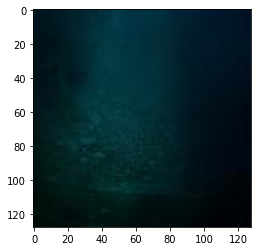

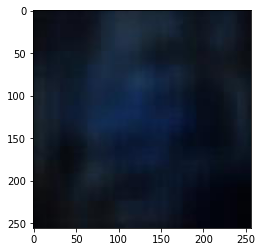

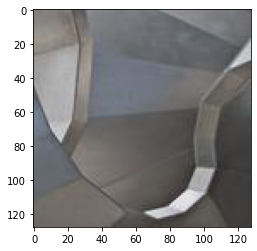

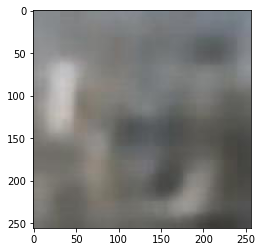

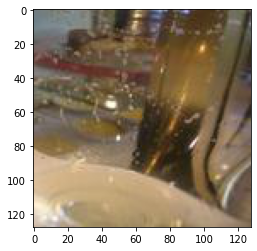

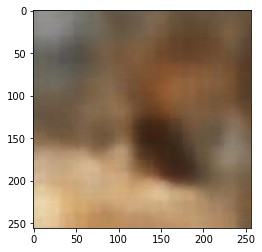

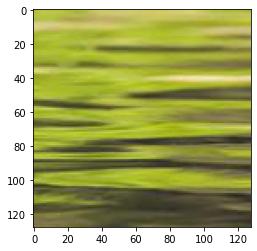

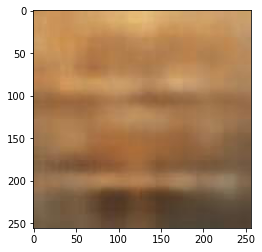

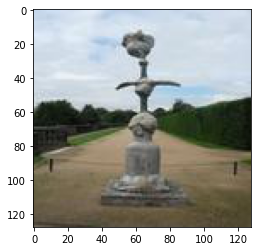

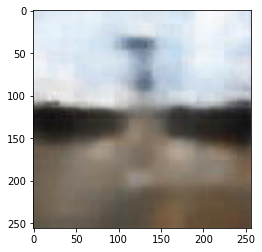

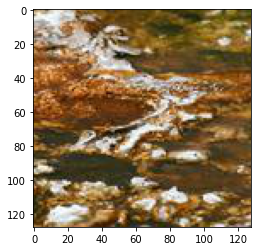

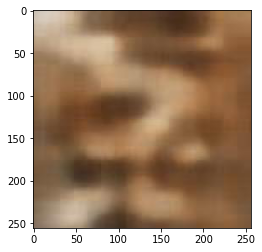

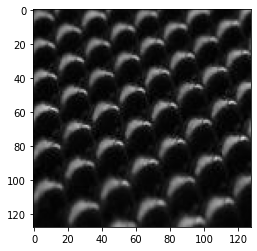

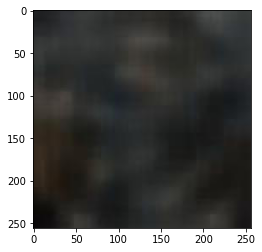

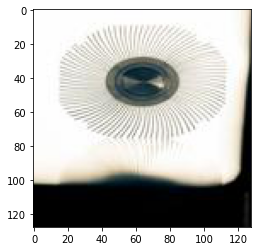

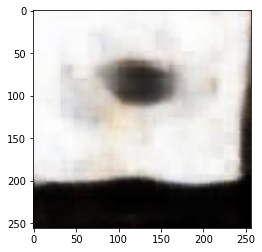

In [8]:
for image in tensor[:8]:
    plt.figure()
    plt.imshow(image)
    plt.figure()
    plt.imshow(enhanceImage(vae.encode_decode(np.array([image]))[0]))